In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection
    
    
# con = PostgresConnection().getConnection()    

### Common Function to fetch Data from all tables 

In [4]:
#  select_stmt= is the SQL select query along with  table and column name    
def retrive_data_from_table(select_stmt): 
    con = PostgresConnection().getConnection()
    cur = con.cursor()
#     select_stmt = "SELECT t.payment_key , t.trans_type, t.bank_name " \
#                   "FROM ecomdb_star_schema.trans_dim t"
    cur.execute(select_stmt)
    records = cur.fetchall()
    return records

### Q9: Break down the total sales of items geographically (division-wise).
#### item1-> division1->total_sales
#### item1-> division2->total_sales

In [9]:
select_stmt = "select i.item_name, s.division, sum(f.total_price) "\
              "from ecomdb_star_schema.fact_table f "\
              "join ecomdb_star_schema.item_dim i on i.item_key = f.item_key "\
              "join ecomdb_star_schema.store_dim s on s.store_key = f.store_key "\
              "group by i.item_name, s.division "


#     "order by i.item_name,s.division"

records = retrive_data_from_table(select_stmt)
df_Q9 = pd.DataFrame(list(records), columns=['Item', 'Division', 'Total Sales'])
df_Q9['Total Sales'] = df_Q9['Total Sales'].astype('float64')

test_df = df_Q9
df_Q9

successfully connected to database


,Item,Division,Total Sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
1808,Zoo Animal Cookies/Crackers,DHAKA,118286.0
1809,Zoo Animal Cookies/Crackers,KHULNA,35434.0
1810,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
1811,Zoo Animal Cookies/Crackers,RANGPUR,25186.0


In [7]:
df_Q9.query('Item == "Zoo Animal Cookies/Crackers"', inplace = True)
df_Q9

,Item,Division,Total Sales
1806,Zoo Animal Cookies/Crackers,BARISAL,24178.0
1807,Zoo Animal Cookies/Crackers,CHITTAGONG,55762.0
1808,Zoo Animal Cookies/Crackers,DHAKA,118286.0
1809,Zoo Animal Cookies/Crackers,KHULNA,35434.0
1810,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
1811,Zoo Animal Cookies/Crackers,RANGPUR,25186.0
1812,Zoo Animal Cookies/Crackers,SYLHET,14728.0


In [25]:
df_Q9.dtypes

Item            object
Division        object
Total Sales    float64
dtype: object

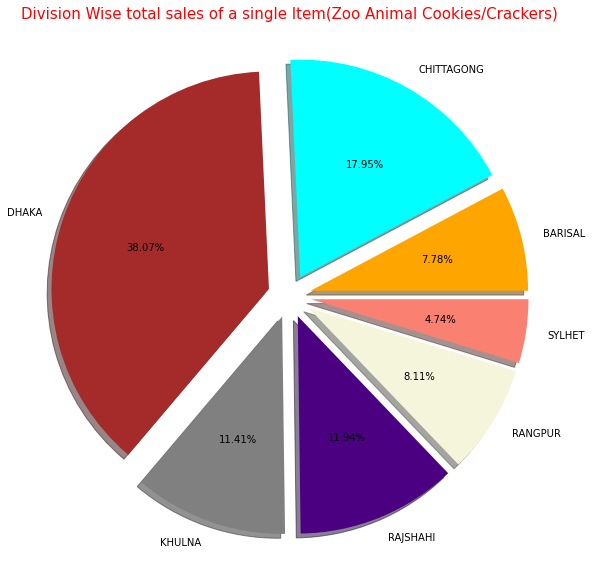

In [24]:
labels=df_Q9['Division']
data = df_Q9['Total Sales']
textprops = {"fontsize":10}
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "salmon")
plt.title('Division Wise total sales of a single Item(Zoo Animal Cookies/Crackers)', size = 15, loc='center', color='r')

plt.pie(data, labels=labels, shadow = True, textprops = textprops, colors=colors, autopct='%.2f%%',explode=(0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1))
plt.rcParams["figure.figsize"] = (15,10)
plt.show()


In [10]:
test_df

,Item,Division,Total Sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
1808,Zoo Animal Cookies/Crackers,DHAKA,118286.0
1809,Zoo Animal Cookies/Crackers,KHULNA,35434.0
1810,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
1811,Zoo Animal Cookies/Crackers,RANGPUR,25186.0


In [62]:
test_dict = test_df.to_dict(orient='records')
test_dict
# [{
#   ‘item’: “item name”,
#   ‘sales’: [
#      {
#        ‘division’: ‘Dhaka’,
#        ‘total_sales’: 1000
#      },
#      {
#        ‘division’: ‘Barisal’,
#        ‘total_sales’: 1000
#      },....
#    ]
#  },.....
# ]

[{'Item': '100% Juice Box Variety 6.75 oz ',
  'Division': 'BARISAL',
  'Total Sales': 23790.0},
 {'Item': '100% Juice Box Variety 6.75 oz ',
  'Division': 'CHITTAGONG',
  'Total Sales': 64950.0},
 {'Item': '100% Juice Box Variety 6.75 oz ',
  'Division': 'DHAKA',
  'Total Sales': 141195.0},
 {'Item': '100% Juice Box Variety 6.75 oz ',
  'Division': 'KHULNA',
  'Total Sales': 37755.0},
 {'Item': '100% Juice Box Variety 6.75 oz ',
  'Division': 'RAJSHAHI',
  'Total Sales': 38730.0},
 {'Item': '100% Juice Box Variety 6.75 oz ',
  'Division': 'RANGPUR',
  'Total Sales': 26685.0},
 {'Item': '100% Juice Box Variety 6.75 oz ',
  'Division': 'SYLHET',
  'Total Sales': 18270.0},
 {'Item': 'A&W Root Beer - 12 oz cans',
  'Division': 'BARISAL',
  'Total Sales': 19101.5},
 {'Item': 'A&W Root Beer - 12 oz cans',
  'Division': 'CHITTAGONG',
  'Total Sales': 52060.5},
 {'Item': 'A&W Root Beer - 12 oz cans',
  'Division': 'DHAKA',
  'Total Sales': 107479.0},
 {'Item': 'A&W Root Beer - 12 oz cans',
  

In [71]:
final_list =[]
new_iner_dict = {"Sales":[]}; 
i =1;

for one_dict in test_dict:
    if(i==8):
        #print(new_iner_dict,'\n\n')
        final_list.append(new_iner_dict)
        new_iner_dict = {"Item":[],"Sales":[]};
        i=1
        
    if(i==1):
        new_iner_dict["Item"] = one_dict['Item']
        #new_iner_dict["Item"].append(one_dict['Item'])    
    if(i<=7):
        new_iner_dict['Sales'].append({'Division': one_dict['Division'], 'Total Sales':one_dict['Total Sales']})
        
    i = i+1
    
    
print(final_list)
          

[{'Sales': [{'Division': 'BARISAL', 'Total Sales': 23790.0}, {'Division': 'CHITTAGONG', 'Total Sales': 64950.0}, {'Division': 'DHAKA', 'Total Sales': 141195.0}, {'Division': 'KHULNA', 'Total Sales': 37755.0}, {'Division': 'RAJSHAHI', 'Total Sales': 38730.0}, {'Division': 'RANGPUR', 'Total Sales': 26685.0}, {'Division': 'SYLHET', 'Total Sales': 18270.0}], 'Item': '100% Juice Box Variety 6.75 oz '}, {'Item': 'A&W Root Beer - 12 oz cans', 'Sales': [{'Division': 'BARISAL', 'Total Sales': 19101.5}, {'Division': 'CHITTAGONG', 'Total Sales': 52060.5}, {'Division': 'DHAKA', 'Total Sales': 107479.0}, {'Division': 'KHULNA', 'Total Sales': 28382.0}, {'Division': 'RAJSHAHI', 'Total Sales': 27795.5}, {'Division': 'RANGPUR', 'Total Sales': 21597.0}, {'Division': 'SYLHET', 'Total Sales': 15249.0}]}, {'Item': 'A&W Root Beer Diet - 12 oz cans', 'Sales': [{'Division': 'BARISAL', 'Total Sales': 10118.25}, {'Division': 'CHITTAGONG', 'Total Sales': 29592.0}, {'Division': 'DHAKA', 'Total Sales': 61290.0}, {

In [ ]:
[
    {'Item': ['100% Juice Box Variety 6.75 oz '],
     'Sales': [{'Division': 'BARISAL', 'Total Sales': 23790.0},
            {'Division': 'CHITTAGONG', 'Total Sales': 64950.0}, 
            {'Division': 'DHAKA', 'Total Sales': 141195.0}, 
            {'Division': 'KHULNA', 'Total Sales': 37755.0}, 
            {'Division': 'RAJSHAHI', 'Total Sales': 38730.0},
            {'Division': 'RANGPUR', 'Total Sales': 26685.0}, 
            {'Division': 'SYLHET', 'Total Sales': 18270.0}]},
    {'Item': ['A&W Root Beer - 12 oz cans'], 
     'Sales': [{'Division': 'BARISAL', 'Total Sales': 19101.5}, 
               
               {'Division': 'CHITTAGONG', 'Total Sales': 52060.5}, 
               {'Division': 'DHAKA', 'Total Sales': 107479.0}, 
               {'Division': 'KHULNA', 'Total Sales': 28382.0}, 
               {'Division': 'RAJSHAHI', 'Total Sales': 27795.5},
               {'Division': 'RANGPUR', 'Total Sales': 21597.0}, 
               {'Division': 'SYLHET', 'Total Sales': 15249.0}]},
    
    {'Item': ['A&W Root Beer Diet - 12 oz cans'], 
     'Sales': [{'Division': 'BARISAL', 'Total Sales': 10118.25}, 
               {'Division': 'CHITTAGONG', 'Total Sales': 29592.0}, 
               {'Division': 'DHAKA', 'Total Sales': 61290.0}, {'Division': 'KHULNA', 'Total Sales': 18191.25}, 
               {'Division': 'RAJSHAHI', 'Total Sales': 17131.5}, {'Division': 'RANGPUR', 'Total Sales': 12129.75},
               {'Division': 'SYLHET', 'Total Sales': 8025.75}]},
    {'Item': ['Advil 2 pill packets'], 'Sales': [{'Division': 'BARISAL', 'Total Sales': 21658.0}, {'Division': 'CHITTAGONG', 'Total Sales': 62846.0}, {'Division': 'DHAKA', 'Total Sales': 124194.0}, {'Division': 'KHULNA', 'Total Sales': 34524.0}, {'Division': 'RAJSHAHI', 'Total Sales': 34314.0}, {'Division': 'RANGPUR', 'Total Sales': 28980.0}, {'Division': 'SYLHET', 'Total Sales': 17248.0}]}, {'Item': ['All Purpose Cleaner 409 Spray'], 'Sales': [{'Division': 'BARISAL', 'Total Sales': 30204.0}, {'Division': 'CHITTAGONG', 'Total Sales': 77418.0}, {'Division': 'DHAKA', 'Total Sales': 151758.0}, {'Division': 'KHULNA', 'Total Sales': 42714.0}, {'Division': 'RAJSHAHI', 'Total Sales': 46674.0}, 
                {'Division': 'RANGPUR', 'Total Sales': 30708.0}, 
                {'Division': 'SYLHET', 'Total Sales': 22896.0}]
},